<a href="https://colab.research.google.com/github/hyunil-cho/ml_practice/blob/main/%EB%89%B4%EB%9F%B4%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴럴 네트워크
---
입력 계층과, 복수 개의 히든 레이어, 그리고 출력 레이어로 이루어진 네트워크로
입력 각 히든 레이어 및 출력 레이어에는, 가중치와 편향이 존재한다.

입력으로 들어온 데이터와 각 계층의 레이어를 행렬곱하고, 다음 레이어로 넘기는 작업을 반복하여, 최종적으로 반환된 결과와, 정답을 비교하고, 차이를 loss function으로 계산하여, 역전파, 가중치를 변경하는 작업을 반복한다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수란?
---


1.   X축의 값이 커짐에 따라, Y축의 값도 함께 커짐
2.   0 - 1 사이의 실수를 반환
3.   비선형 함수로, 곡선의 모양을 띄고 있음

---

## 비선형 함수를 활성화 함수로 사용하는 이유?

---

1.  선형 함수를 사용하게 되면, 아무리 깊이를 높이더라도, 의미가 없어짐
2.  비선형 함수를 사용해야 미분이 가능(선형 함수의 경우, 미분을 하게 되면 상수게 되기 때문)



In [56]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x));

def relu(x):
  return np.maximum(0,x)

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

시그모이드 함수
렐루 함수

[-5 -4 -3 -2 -1  0  1  2  3  4]


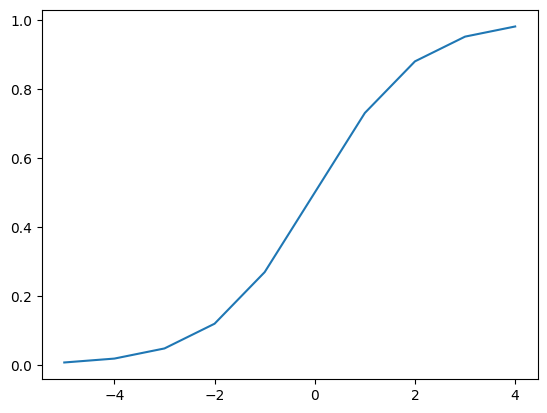

[-5 -4 -3 -2 -1  0  1  2  3  4]


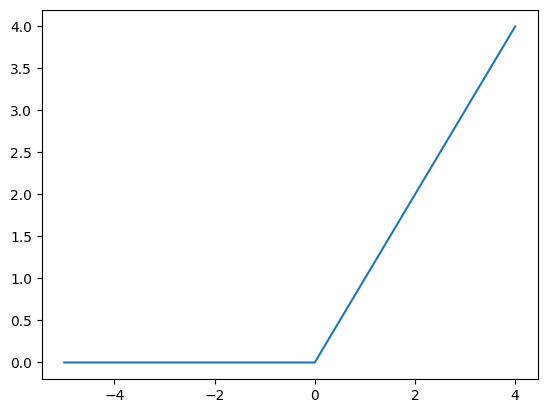

[-5 -4 -3 -2 -1  0  1  2  3  4]


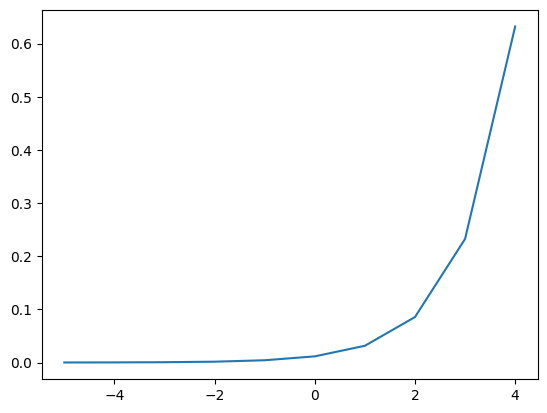

In [57]:
x = np.arange( -5, 5 , 1)
print(x)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

x = np.arange( -5, 5 , 1)
print(x)
y = relu(x)
plt.plot(x,y)
plt.show()

x = np.arange( -5, 5 , 1)
print(x)
y = softmax(x)
plt.plot(x,y)
plt.show()

In [31]:
X = np.array([1,2])
W1 = np.array([[2,4,6], [3,5,7]])
B1 = np.array([1,2,3])
W2 = np.array([[1,2],[2,4],[4,5]])

r = sigmoid(np.dot(sigmoid(np.dot(X,W1)+B1),W2))

r

array([0.99908884, 0.99998329])

네트워크
1X2 2X3 3X2

In [63]:
import random

def create_network():
  network = {}
  network['W1'] = np.array([ [random.random() for _ in range(3)] for x in range(2)])
  network['B1'] = np.array([  random.random() for _ in range(3)])
  network['W2'] = np.array([ [random.random() for _ in range(2)] for _ in range(3)])
  network['B2'] = np.array([ random.random() for _ in range(2)])
  network['W3'] = np.array([[ random.random() for _ in range(2)] for _ in range(2)])
  network['B3'] = np.array([ random.random() for _ in range(2)])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  B1, B2, B3 = network['B1'], network['B2'], network['B3']

  a1 = np.dot(x, W1) + B1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + B2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + B3
  y = softmax(a3)

  return y

network = create_network()
result = forward(network, np.array([1,2]))
print(result, softmax(result))

softmax_sum = np.sum(softmax(result))
print(softmax_sum)

[0.62408899 0.37591101] [0.56172799 0.43827201]
1.0


In [43]:
np.array([ [random.random() for _ in range(2)] for x in range(2)])

array([[0.23322496, 0.63117838],
       [0.77062385, 0.37111013]])